# Tensorflow Tutorial

In [1]:
import tensorflow as tf
import numpy as np

# Minimizing a Fixed Mathematical Function Using Tensorflow:
y = x^2 + 5x + 10
The parameter(beta or weight in case of a neural network) for which we have to find optimized value has to be declared as a tensorflow variable. eg: Here, x has to be declared as a tensorflow variable.

In [2]:
# Declaring x as a variable with initial value as 0 and datatype as 64 bit floating number.
x = tf.Variable(0 , dtype = tf.float32 )

In [3]:
# Writing the mathematical function (cost function in machine learning) which we need to minimize.
# There are 2 ways to write this function.
# y = tf.add(tf.add(x**2 , tf.multiply(5.0,x)), 10)
# Operators are already overloaded ,so we can write the expression in the following way.
y = x**2 + 5*x + 10

In [4]:
# Algorithm that will minimize the function y:
# Gradient Descent with learning rate = 0.1  
train = tf.train.GradientDescentOptimizer(0.1).minimize(y)

In [5]:
# Initializing the global variables.
init = tf.global_variables_initializer()

In [6]:
# Till now, we haven't executed anything. We have just defined the things to be done. 
# To run our program, we need to create a session.
sess = tf.Session()

In [7]:
# Running the program with the help of sess object:
# Firstly, we have to run the init i.e. initialize the global variables,
# then only we can run things using the variables.
sess.run(init)

In [8]:
# Running the variable x:
sess.run(x)

0.0

In [9]:
# Running the gradient descent algorithm for 1 iteration:
sess.run(train)

In [10]:
# Check the value of x after 1 iteration of Gradient Descent Algorithm:
sess.run(x)

-0.5

In [11]:
# Running the Gradient Descent Algorithm for many iterations using a for loop:
for i in range(100):
    sess.run(train)

In [12]:
# Check the final value of parameter. 
sess.run(x)

-2.4999995

# Using Tensorflow to minimize a cost function that is not fixed and uses data.
In the above program, we have minimized a cost function that is fixed. Let's see how we can minimize a changing cost function i.e. when the coefficient of the equation can change.<br>
Now, instead of providing fixed coefficient to the function y as 1, 5, 10, we would provide a way so that we can change the co-efficients. For this, we use the concept of tensorflow placeholder.  

In [13]:
# Tensorflow Placeholder: It is an object whose value we can pass during session.run(). See the program.
# Creating a placeholder of shape i.e. an array [3,1] with datatype as float64 
x = tf.placeholder(tf.float64 , [3,1])
# Also, we need to have a variable. Let us create a new variable 'w'
w = tf.Variable( 0 , dtype = tf.float64)

In [14]:
# Function to be optimized.
y = x[0][0] * w ** 2 + x[1][0] * w + x[2][0] 

In [15]:
# Defining the algorithm that will minimize the function 'y':
train = tf.train.GradientDescentOptimizer(0.1).minimize(y)

In [16]:
# Creating a numpy array of shape (3,1) , whose values we will use to feed x:
coefficients = np.array([[5] , [7], [100]])

In [17]:
# Declaring Global Variable Initializer
init1 = tf.global_variables_initializer()
# Creating Session object
session = tf.Session()

In [18]:
# Running init1 
session.run(init1)

In [19]:
session.run(w)

0.0

Note: Feed cannot be a tensor object. It can be an object like numpy array.

In [20]:
# Here, we will provide the value of x using coefficients numpy array.
session.run(train , feed_dict = {x : coefficients })

In [21]:
session.run(w)

-0.70000001043081284

In [22]:
# Running Train for many iterations:
for i in range(100):
    session.run(train , feed_dict = {x:coefficients })

In [23]:
session.run(w)

-0.69999999999999996

# Training a Neural Network Using Tensorflow.
Now, we will use Tensorflow to train a Neural Network. In a Neural Network, we have 2 main steps:<br>
1) Forward Propagation <br>
2) Backward Propagation <br>

We do forward propagation, calculate cost function , and then do backpropagation to calculate derivative of cost function w.r.t parameters and finally update the parameters using Gradient Descent. <br>
As you have already seen that doing backpropagation even in a simple Neural Network can be tricky or difficult. Deep Learning Frameworks like Tensorflow makes it easier for us. <br>
We only write the forward propagation, calculate the cost function and rest of the work is done by Tensorflow!!!

In [24]:
# Let us use the cancer dataset as we did in assignment 4 and learn a classifier using a Neural Network 
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

In [25]:
# Loading and preprocessing the dataset. Same as done in Assignment 4 
cancer=load_breast_cancer()
x_scale =  preprocessing.scale(cancer.data)
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x_scale, cancer.target, stratify= cancer.target, random_state=0)
x_train = x_train.T
y_train = y_train.reshape((1 ,y_train.shape[0]))
x_test = x_test.T
y_test = y_test.reshape((1,y_test.shape[0]))

In [26]:
# Let us see the datasets.
x_test.shape


(30, 143)

# Note the shape of data set : A column represents an example and row represents a feature. 
This notation helps. This helps in vectorized implementation i.e. we need not use a for loop to forward propagate all examples. We can do this using a single line of code.We will see this later. 

# Creating Placeholders for training data:
Remember that training data will always be in a placeholders and actual values will be passed when we run the session.

In [27]:
# We use none because we can change the number of training examples to pass to the optimizer.
# If we are doing batch gradient descent, we will pass all examples or pass 1 example in an iteration when doing stochastic gradient descent.
X = tf.placeholder(tf.float32, [x_train.shape[0], None], name="X")

In [28]:
Y = tf.placeholder(tf.float32, [y_train.shape[0], None], name="Y")

# Parameter/Weights Initialization
Remember that the parameters/weights have to be Tensorflow Variables.<br>
We should not initialize W as zeros. We can initialize b as 0.

In [29]:
W1 = tf.get_variable("W1", [30, 30], initializer = tf.random_normal_initializer)

In [30]:
b1 = tf.get_variable("b1", [30, 1], initializer = tf.zeros_initializer())

In [31]:
W2 = tf.get_variable("W2", [30, 30], initializer = tf.random_normal_initializer)

In [32]:
b2 = tf.get_variable("b2" , [30,1] ,  initializer = tf.zeros_initializer())

In [33]:
W3 = tf.get_variable("W3" , [1,30] , initializer = tf.random_normal_initializer)

In [34]:
b3 = tf.get_variable("b3" , [1,1] , initializer = tf.zeros_initializer())

# Forward Propagation:

In [35]:
# Linear Part of First Hidden Layer, Values of 'b' will automatically broadcasted according to the number of examples. 

Z1 = tf.add(tf.matmul(W1, X), b1)                         # Same as Z1 = np.dot(W1, X) + b1
# Applying Sigmoid Activation on Z1
A1 = tf.nn.sigmoid(Z1)                                    # Same as A1 = sigmoid(Z1)
# Linear Part of Second Hidden Layer  
Z2 = tf.add(tf.matmul(W2, A1), b2)                        # Same as Z2 = np.dot(W2, a1) + b2
# Applying Sigmoid Activation on Z1
A2 = tf.nn.sigmoid(Z2)                                    # Same as A2 = sigmoid(Z2)
# Output Node
Z3 = tf.add(tf.matmul(W3, A2), b3)
# Sigmoid of A3
A3 = tf.nn.sigmoid(Z3)

# Computing the cost
Now, we have to compute cost function:

In [36]:
cost = -(tf.reduce_sum(Y * tf.log(A3)) + tf.reduce_sum((1-Y)*tf.log(1-A3)))/y_train.shape[1]

In [37]:
# Creating the optimizer:
optimizer = tf.train.GradientDescentOptimizer(0.02).minimize(cost)

In [38]:
# Initializzing all the global variables.
init = tf.global_variables_initializer()

In [39]:
session_1 = tf.Session()

In [40]:
session_1.run(init)

In [41]:
session_1.run(optimizer , feed_dict={X:x_train,Y:y_train })

In [42]:
# Let us see how the cost function gets optimized by plotting the cost:
# Initialize a python list to store cost value
cost_plot = []
for i in range(10000):
    session_1.run(optimizer , feed_dict={X:x_train,Y:y_train })
    cost_value = session_1.run(cost , feed_dict={X:x_train,Y:y_train })
    cost_plot.append(cost_value)
    

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
iters = np.array(range(0,10000))

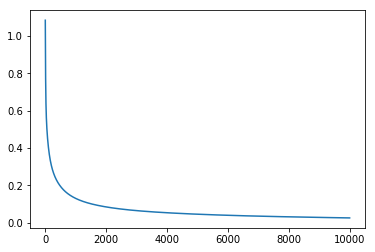

In [45]:
plt.plot(iters,cost_plot)

In [107]:
cost_plot

[2.2728212,
 2.2277806,
 2.1828883,
 2.1381502,
 2.0935795,
 2.0491862,
 2.0049825,
 1.9609834,
 1.9172014,
 1.8736538,
 1.830356,
 1.7873274,
 1.7445874,
 1.7021577,
 1.6600616,
 1.6183236,
 1.5769701,
 1.5360298,
 1.4955316,
 1.4555075,
 1.4159907,
 1.3770155,
 1.3386179,
 1.3008343,
 1.2637028,
 1.2272607,
 1.191547,
 1.1565992,
 1.1224539,
 1.089147,
 1.0567125,
 1.025182,
 0.99458426,
 0.96494478,
 0.9362852,
 0.90862364,
 0.88197345,
 0.85634339,
 0.83173764,
 0.80815578,
 0.78559238,
 0.76403791,
 0.74347818,
 0.72389531,
 0.70526731,
 0.68756956,
 0.67077416,
 0.6548509,
 0.63976771,
 0.62549096,
 0.61198604,
 0.59921747,
 0.58714956,
 0.57574689,
 0.56497389,
 0.55479562,
 0.54517829,
 0.53608888,
 0.52749527,
 0.51936686,
 0.51167423,
 0.50438929,
 0.49748543,
 0.49093729,
 0.48472115,
 0.47881451,
 0.47319633,
 0.46784669,
 0.46274728,
 0.45788077,
 0.45323104,
 0.44878316,
 0.44452325,
 0.4404383,
 0.43651631,
 0.43274629,
 0.42911792,
 0.42562172,
 0.42224878,
 0.41899106,

# Predicting on Test Set:
We need to find A3 for all examples in the Test Set:

In [114]:
predictions = session_1.run(A3,feed_dict={X:x_test })

In [115]:
pred = (predictions > 0.5)

In [121]:
accuracy_test = np.sum(pred == y_test)/y_test.shape[1]

In [122]:
accuracy_test

0.965034965034965

In [119]:
pred_train = session_1.run(A3,feed_dict={X:x_train })

In [120]:
pred_training = (pred_train > 0.5)

In [123]:
accuracy_test = np.sum(pred_training == y_train)/y_train.shape[1]

In [124]:
accuracy_test

0.99295774647887325

# Note:
There are many in-built cost functions in Tensorflow and most of the times, we use them. But for this, we need to have our labels i.e. output variable in the form of 'one-hot vectors'. Sinse in this tutorial, we didn't have y as one-hot vectors, so I wrote the full cost function.Also, tensorflow has an in-built function to convert your labels into one-hot vectors. You can find more tutorials in this link: https://www.tensorflow.org/<br>

Also, to install tensorflow:<br>
1) Open terminal/command window.<br>
2) Open conda terminal by using the command: conda.<br>
3) In the conda terminal, enter the following command: conda install -c conda-forge tensorflow 

This will install tensorflow in your anaconda environment and finally, you can use it in the jupyter notebook.